In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('../data/raw/superstore.csv')

In [7]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
0,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,No,Online
1,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,No,Online
2,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2,67.2742,No,Cards
3,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,California,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,No,Online
4,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,Texas,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,No,Online


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       5901 non-null   object 
 1   Order Date     5901 non-null   object 
 2   Ship Date      5901 non-null   object 
 3   Ship Mode      5901 non-null   object 
 4   Customer ID    5901 non-null   object 
 5   Customer Name  5901 non-null   object 
 6   Segment        5901 non-null   object 
 7   Country        5901 non-null   object 
 8   City           5901 non-null   object 
 9   State          5901 non-null   object 
 10  Region         5901 non-null   object 
 11  Product ID     5901 non-null   object 
 12  Category       5901 non-null   object 
 13  Sub-Category   5901 non-null   object 
 14  Product Name   5901 non-null   object 
 15  Sales          5901 non-null   float64
 16  Quantity       5901 non-null   int64  
 17  Profit         5901 non-null   float64
 18  Returns 

In [9]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Profit           0
Returns          0
Payment Mode     0
dtype: int64

In [24]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format = 'mixed')

In [19]:
df.rename(columns = {'Order Date': 'Order_Date'}, inplace = True)

In [25]:
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['DayofWeek'] = df['Order_Date'].dt.dayofweek

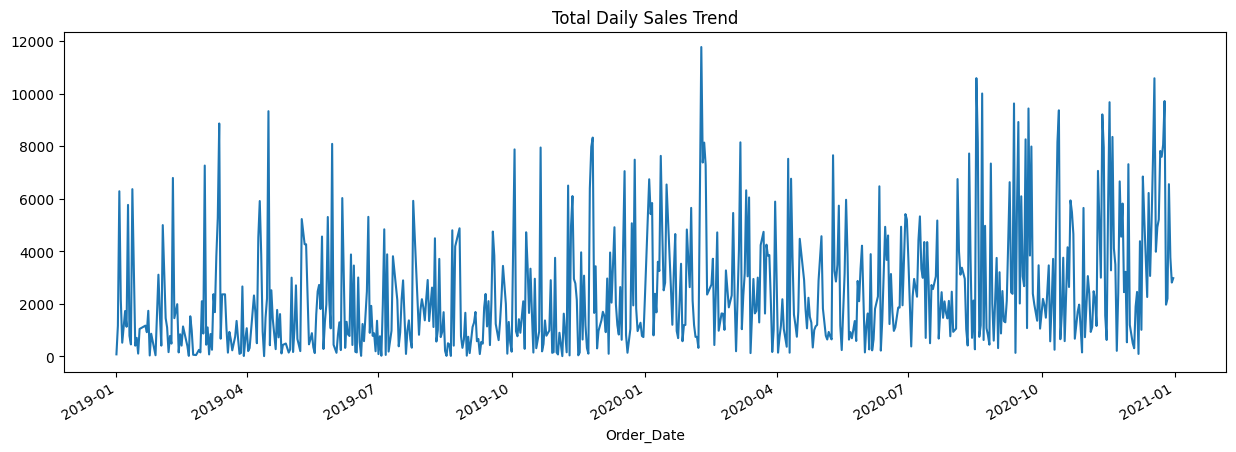

In [31]:
df.groupby('Order_Date')['Sales'].sum().plot(figsize=(15,5), title='Total Daily Sales Trend')
plt.show()

<Axes: title={'center': 'Avg Sales by Day of Week'}, xlabel='DayofWeek'>

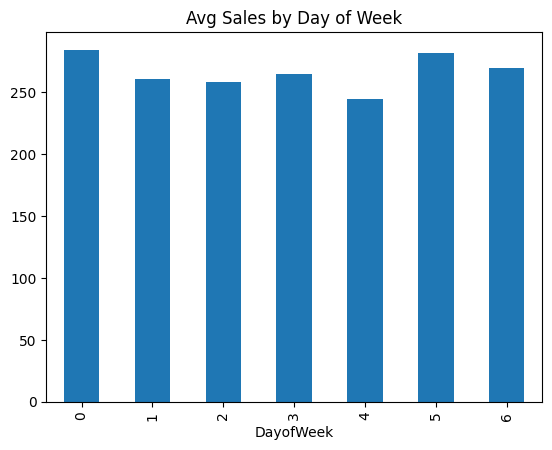

In [32]:
df.groupby('DayofWeek')['Sales'].mean().plot(kind='bar', title='Avg Sales by Day of Week')

In [36]:
grouped19 = df[df['Year'] == 2019].groupby('Month')['Sales'].sum()
grouped20 = df[df['Year'] == 2020].groupby('Month')['Sales'].sum()

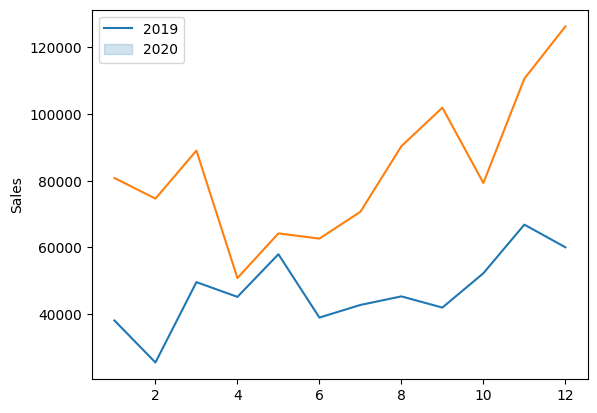

In [40]:
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

sns.lineplot(x = month, y=grouped19)
sns.lineplot(x=month, y=grouped20)
plt.legend(['2019','2020'])

plt.show()

<Axes: xlabel='Order_Date'>

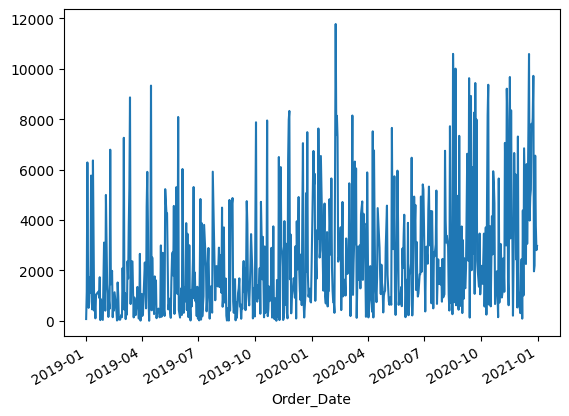

In [41]:
df.groupby('Order_Date')['Sales'].sum().plot()

In [43]:
grp19 = df[df['Year'] == 2019]

<Axes: xlabel='Week_Number'>

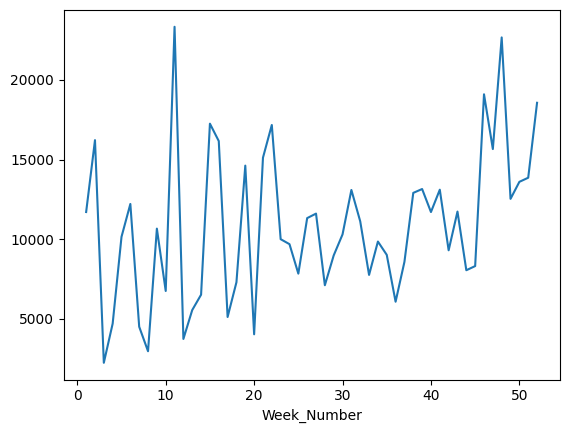

In [50]:
grp19.groupby('Week_Number')['Sales'].sum().plot()

In [49]:
grp19['Week_Number'] = grp19['Order_Date'].dt.isocalendar().week

C:\Users\Admin\AppData\Local\Temp\ipykernel_21208\4241636160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grp19['Week_Number'] = grp19['Order_Date'].dt.isocalendar().week
